### Cifar-10 이미지 분류 - v1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리 

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
y_train[0]

array([6], dtype=uint8)

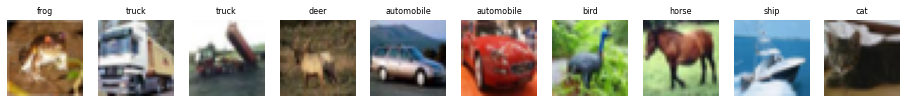

In [6]:
plt.figure(figsize=(16, 4))
for i in range(10) :
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i]), plt.axis('off')
    plt.title(class_names[y_train[i, 0]], fontsize=8)
plt.show()

In [7]:
# X_data : scaling
X_train = X_train / 255.
X_test = X_test / 255.

In [8]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [9]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [21]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same',activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [22]:
model.compile(
    optimizer=RMSprop(learning_rate = 0.0001, decay=1e-6),
    loss ='categorical_crossentropy',
    metrics = ['accuracy']
)

In [23]:
model_path = 'best-cifar10-v1.h5'
mc = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

In [24]:
hist = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=100, batch_size=32, 
          callbacks=[mc, es])

Epoch 1/100
1244/1250 [============================>.] - ETA: 0s - loss: 1.9157 - accuracy: 0.2969
Epoch 1: val_loss improved from inf to 1.63978, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9148 - accuracy: 0.2973 - val_loss: 1.6398 - val_accuracy: 0.4146
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 1.5557 - accuracy: 0.4358
Epoch 2: val_loss improved from 1.63978 to 1.42327, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5557 - accuracy: 0.4358 - val_loss: 1.4233 - val_accuracy: 0.4953
Epoch 3/100
1241/1250 [============================>.] - ETA: 0s - loss: 1.4170 - accuracy: 0.4889
Epoch 3: val_loss improved from 1.42327 to 1.30250, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4167 - accuracy: 0.4892 - val_loss: 1.3025 - val_accuracy: 0.5438
Epoch 4/100
1249/1250 [========================

In [25]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6595 - accuracy: 0.7790


[0.6595458388328552, 0.7789999842643738]

In [28]:
y_acc1 = hist.history['accuracy']
y_vloss1 = hist.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)

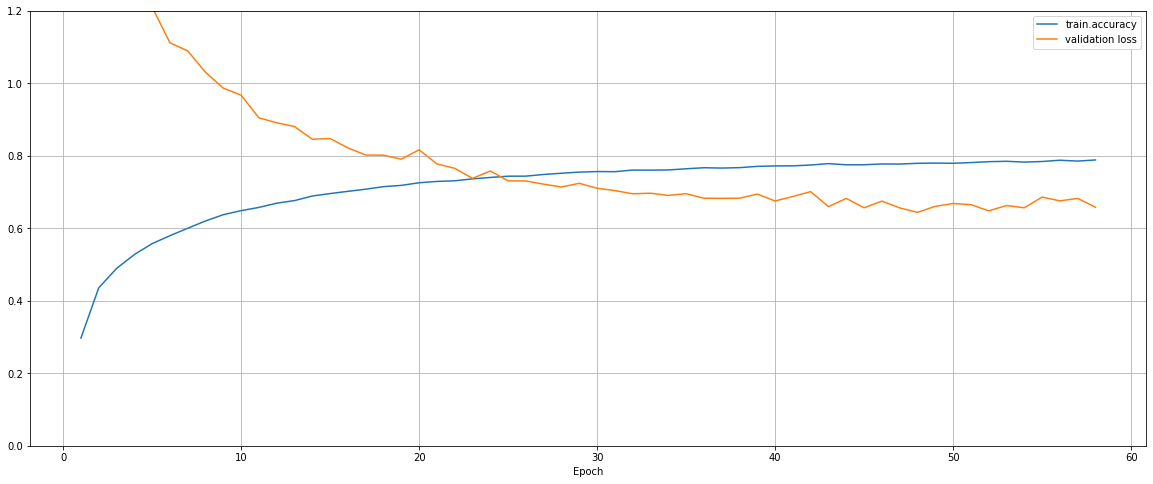

In [29]:
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()